In [1]:
!pip install emoji

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ----------------- ---------------------- 262.1/590.6 kB ? eta -:--:--
   ---------------------------------------- 590.6/590.6 kB 1.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install matplotlib wordcloud textblob nltk

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 3.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import emoji
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aniruddha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aniruddha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [45]:
df.shape


(5572, 2)

In [46]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [47]:
df.drop_duplicates(inplace=True)

In [48]:
#now it should be false
df.duplicated().any()


np.False_

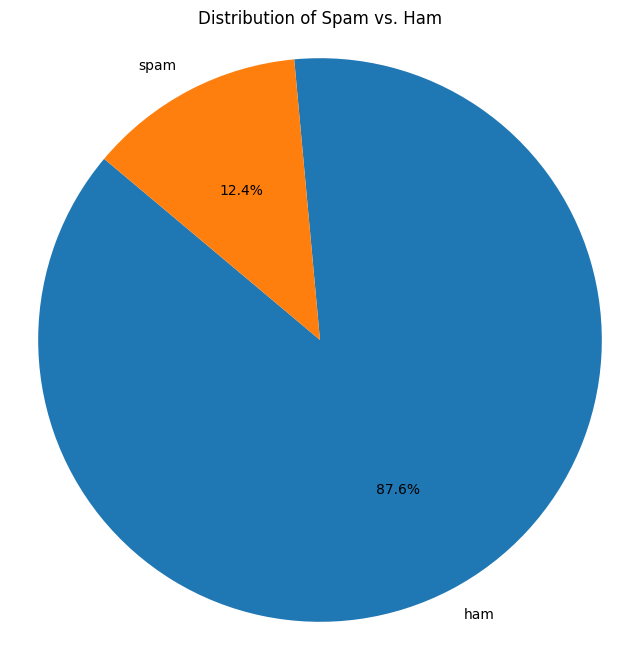

In [49]:
# Calculate the count of each label
category_counts = df['Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam vs. Ham')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#TEXT VISUALIZATION

- Iterate through unique categories: This loop iterates through each unique category in the 'Category' column of the DataFrame df.¶
- Filter the DataFrame for the current category: Inside the loop, the code filters the DataFrame df to create a new DataFrame filtered_df containing only the rows where the 'Category' column matches the current category.
- Concatenate all text data for the current category: The code then concatenates all the text data from the 'Message' column of filtered_df into a single string variable named text.
- Generate word cloud: Using the concatenated text data (text), the code generates a word cloud using the WordCloud module. The word cloud is configured to have a width of 800 pixels, a height of 400 pixels, and a white background.
- Plot the word cloud: Finally, the code plots the generated word cloud using Matplotlib. Each word's size in the word cloud is proportional to its frequency in the concatenated text data. The title of each word cloud plot includes the current category being processed. The plt.axis('off') command is used to hide the axes of the plot.
This process repeats for each unique category, generating a separate word cloud for each category based on the text data associated with that category.

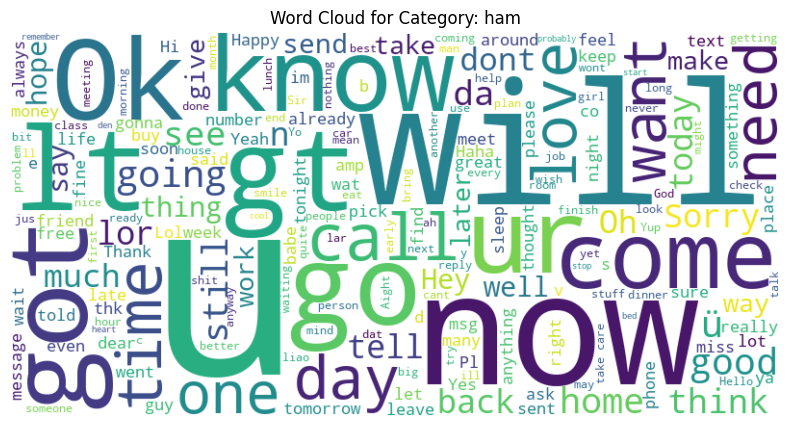

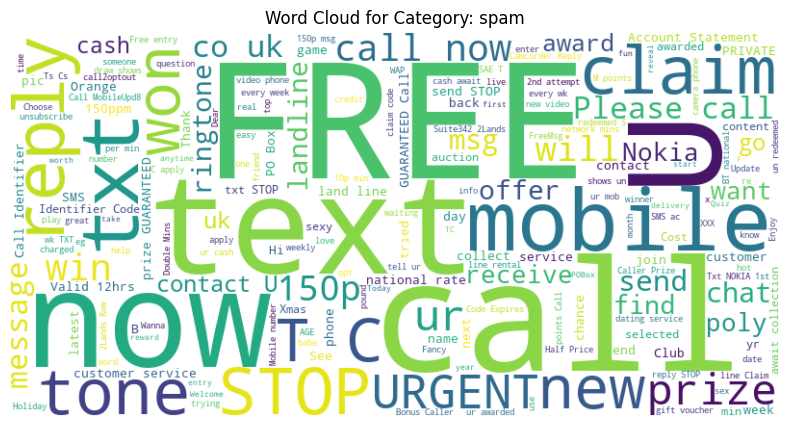

In [50]:
# Iterate through unique categories
for category in df['Category'].unique():
    # Filter the DataFrame for the current category
    filtered_df = df[df['Category'] == category]

    # Concatenate all text data for the current category
    text = ' '.join(filtered_df['Message'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()

In [51]:
le = LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#Text Preprocessing

1. Lower Casing¶
2. Remove Extra White Spaces
3. Remove HTML Tags
4. Remove URLs
5. Remove Punctuations
6. Remove Special Characters
7. Remove Numeric Values
8. Remove Non-alpha Numeric

10. Handling StopWords¶
11. Handling Emojis
12. Stemming



In [53]:
df['Message'] = df['Message'].str.lower()

In [54]:
df['Message'] = df['Message'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [55]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

df['Message'] = df['Message'].apply(remove_html_tags)

In [57]:
def remove_urls(text):
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return re.sub(url_pattern, '', text)

df['Message'] = df['Message'].apply(remove_urls)

In [58]:
def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'
    return re.sub(pattern, '', text)

df['Message'] = df['Message'].apply(remove_special_characters)

In [59]:
def remove_numeric(text):
    return re.sub(r'\d+', '', text)

df['Message'] = df['Message'].apply(remove_numeric)

In [60]:
def remove_non_alphanumeric(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

df['Message'] = df['Message'].apply(remove_non_alphanumeric)

In [61]:
# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [62]:
def replace_chat_words(text):
    words = text.split()
    replaced_words = [chat_words.get(word.upper(), word) for word in words]
    return ' '.join(replaced_words)

df['Message'] = df['Message'].apply(replace_chat_words)

In [63]:


# Download NLTK stopwords corpus
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column
df['Message'] = df['Message'].apply(remove_stopwords)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aniruddha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
# Function to remove emojis from text
def remove_emojis(text):
    return emoji.demojize(text)

# Apply remove_emojis function to 'Text' column
df['Message'] = df['Message'].apply(remove_emojis)


In [65]:
df.head()

,Category,Message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,dun say early hor c already say
4,0,nah dont think goes usf lives around though


In [66]:
# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Apply stemming
df['Message_stemmed'] = df['Message'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))
df.head()


,Category,Message,Message_stemmed
0,0,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif oni,ok lar joke wif oni
2,1,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkt st m...
3,0,dun say early hor c already say,dun say earli hor c alreadi say
4,0,nah dont think goes usf lives around though,nah dont think goe usf live around though


In [67]:
#Convert text to numbers using bag of words
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(df['Message_stemmed']).toarray()
y = df['Category']


In [68]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

#Solve this problem using naive bayes classifier

In [ ]:
class NaiveBayes:
    def __init__(self,alpha=1):
        self.class_priors = {}
        self.feature_likelihoods = {}
        self.classes = None
        self.num_features = 0
        self.alpha = alpha  # Laplace smoothing parameter
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.num_features = X.shape[1]
        for cls in self.classes:
            X_cls = X[y == cls]
            self.class_priors[cls] = X_cls.shape[0] / X.shape[0]
            # Calculate likelihoods with Laplace smoothing
            self.feature_likelihoods[cls] = (np.sum(X_cls, axis=0) + self.alpha) / (X_cls.shape[0] + self.alpha * self.num_features)
    
    def predict(self, X):
        predictions = []
        for x in X:
            class_probs = {}
            for cls in self.classes:
                prior = np.log(self.class_priors[cls])
                likelihood = np.sum(np.log(self.feature_likelihoods[cls]) * x)
                class_probs[cls] = prior + likelihood
            predictions.append(max(class_probs, key=class_probs.get))
        return np.array(predictions)

testing

In [36]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

print("=== NAIVE BAYES BASELINE ===")
print("Model: Multinomial Naive Bayes (bag-of-words counts)")
print("Smoothing: Laplace (+1)")
print()

# Train baseline Naive Bayes model
nb_baseline = NaiveBayes()
nb_baseline.fit(X_train, y_train)

# Make predictions
y_pred_baseline = nb_baseline.predict(X_test)

# Calculate metrics
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
precision_baseline = precision_score(y_test, y_pred_baseline)
recall_baseline = recall_score(y_test, y_pred_baseline)
f1_baseline = f1_score(y_test, y_pred_baseline)
conf_matrix_baseline = confusion_matrix(y_test, y_pred_baseline)

print("BASELINE RESULTS:")
print(f"Accuracy: {accuracy_baseline}")
print(f"Precision: {precision_baseline}")
print(f"Recall: {recall_baseline}")
print(f"F1-Score: {f1_baseline}")
print()
print("Confusion Matrix:")
print(conf_matrix_baseline)
print()
print("Classification Report:")
print(classification_report(y_test, y_pred_baseline))

=== NAIVE BAYES BASELINE ===
Model: Multinomial Naive Bayes (bag-of-words counts)
Smoothing: Laplace (+1)

BASELINE RESULTS:
Accuracy: 0.9738372093023255
Precision: 0.9504132231404959
Recall: 0.8455882352941176
F1-Score: 0.8949416342412452

Confusion Matrix:
[[890   6]
 [ 21 115]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       896
           1       0.95      0.85      0.89       136

    accuracy                           0.97      1032
   macro avg       0.96      0.92      0.94      1032
weighted avg       0.97      0.97      0.97      1032



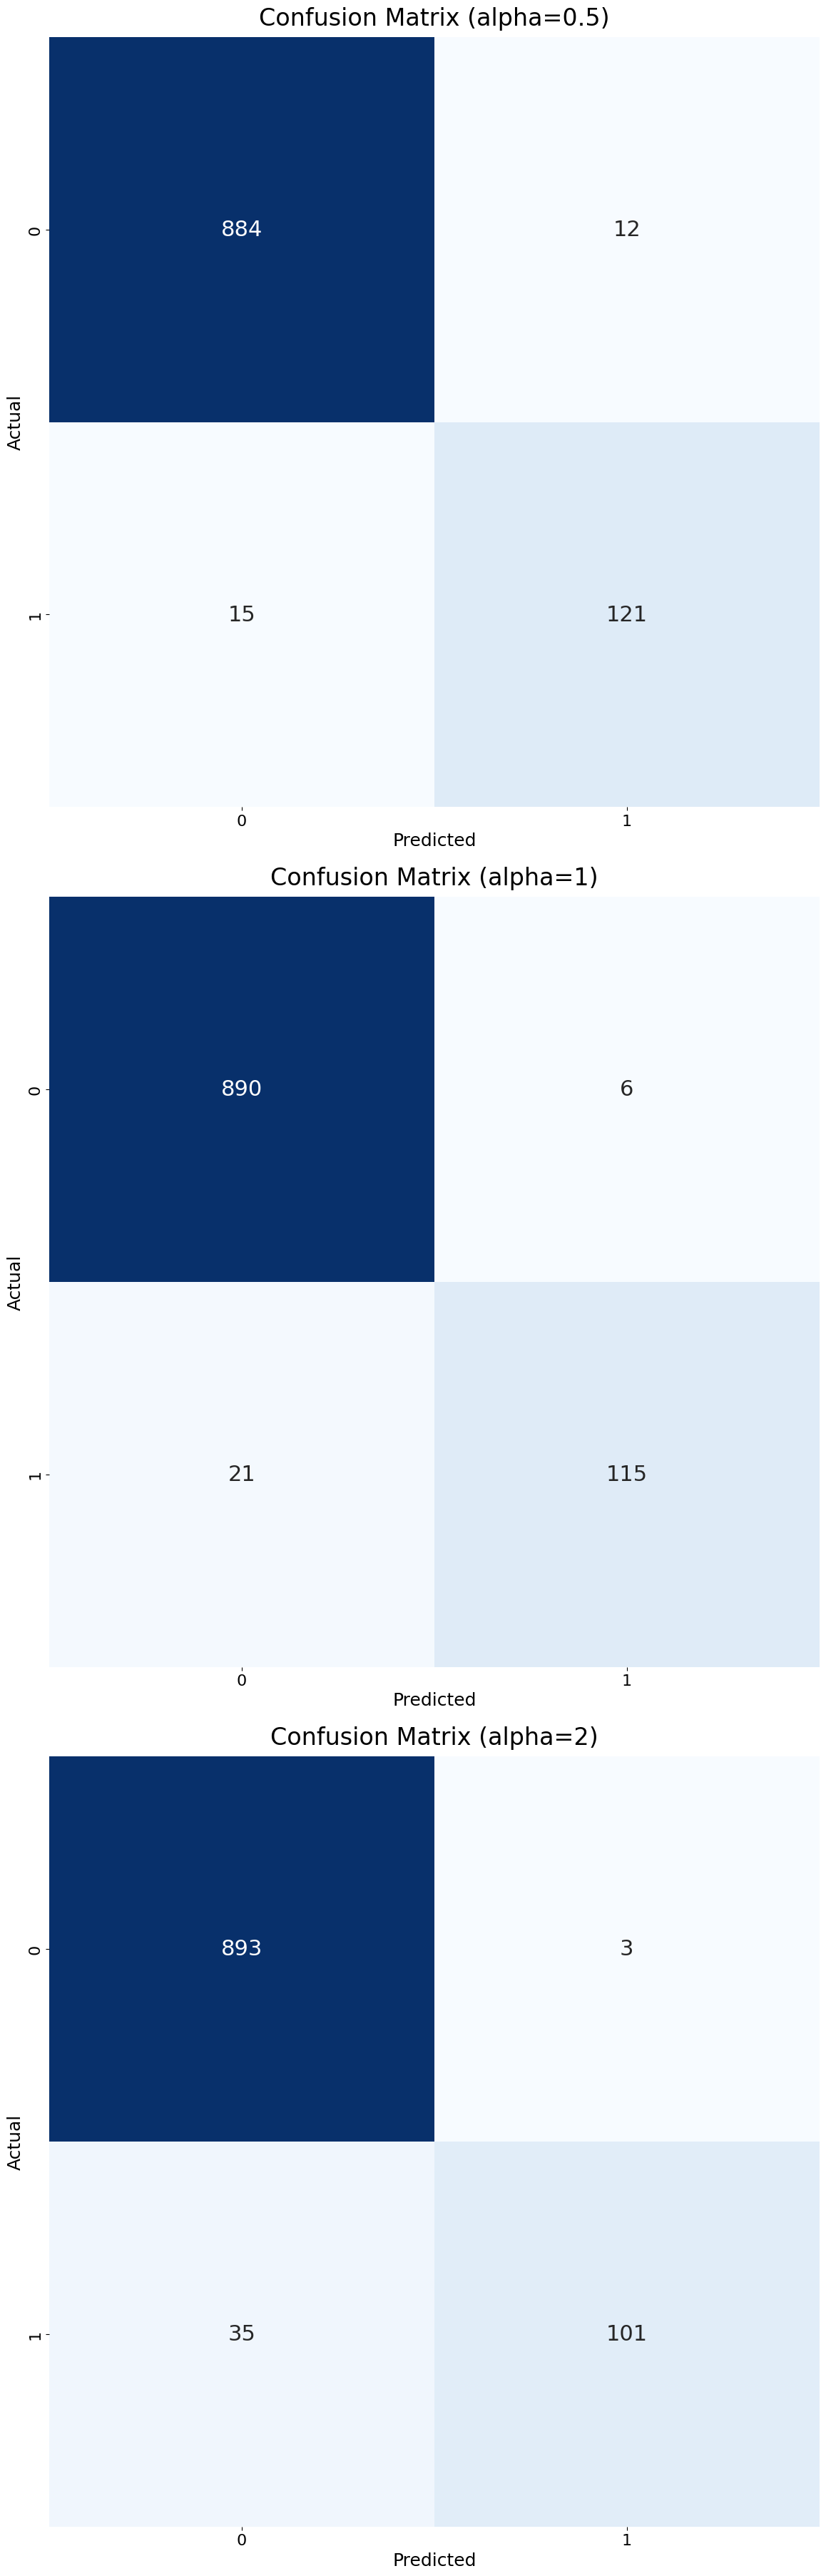

In [38]:
import seaborn as sns

alphas = [0.5, 1, 2]

# One per row so each gets full width; tall figure height
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 36), constrained_layout=True)

for ax, alpha in zip(axes, alphas):
    nb = NaiveBayes(alpha=alpha)
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)

    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=False,
        ax=ax,
        annot_kws={"size": 22},
        square=True
    )
    ax.set_title(f'Confusion Matrix (alpha={alpha})', fontsize=24, pad=12)
    ax.set_xlabel('Predicted', fontsize=18)
    ax.set_ylabel('Actual', fontsize=18)
    ax.tick_params(axis='both', labelsize=16)

plt.show()

=== NAIVE BAYES WITH TF-IDF ===
Accuracy: 0.9312015503875969
Precision: 1.0
Recall: 0.47794117647058826
F1-Score: 0.6467661691542289

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       896
           1       1.00      0.48      0.65       136

    accuracy                           0.93      1032
   macro avg       0.96      0.74      0.80      1032
weighted avg       0.94      0.93      0.92      1032



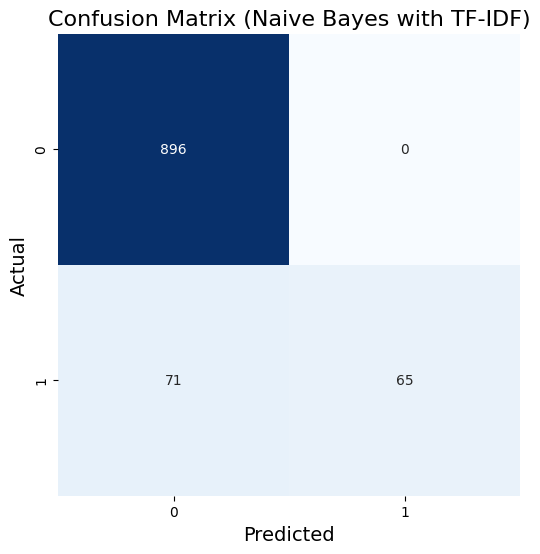

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Message_stemmed']).toarray()

# Train/test split
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train Naive Bayes model on TF-IDF features
nb_tfidf = NaiveBayes()
nb_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

# Evaluate
print("=== NAIVE BAYES WITH TF-IDF ===")
print(f"Accuracy: {accuracy_score(y_test_tfidf, y_pred_tfidf)}")
print(f"Precision: {precision_score(y_test_tfidf, y_pred_tfidf)}")
print(f"Recall: {recall_score(y_test_tfidf, y_pred_tfidf)}")
print(f"F1-Score: {f1_score(y_test_tfidf, y_pred_tfidf)}")
print()
print("Classification Report:")
print(classification_report(y_test_tfidf, y_pred_tfidf))
conf_matrix_tfidf = confusion_matrix(y_test_tfidf, y_pred_tfidf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.title('Confusion Matrix (Naive Bayes with TF-IDF)', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

=== NAIVE BAYES (scikit-learn MultinomialNB) ===
Accuracy: 0.9641472868217055
Precision: 0.803680981595092
Recall: 0.9632352941176471
F1-Score: 0.8762541806020067

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       896
           1       0.80      0.96      0.88       136

    accuracy                           0.96      1032
   macro avg       0.90      0.96      0.93      1032
weighted avg       0.97      0.96      0.97      1032



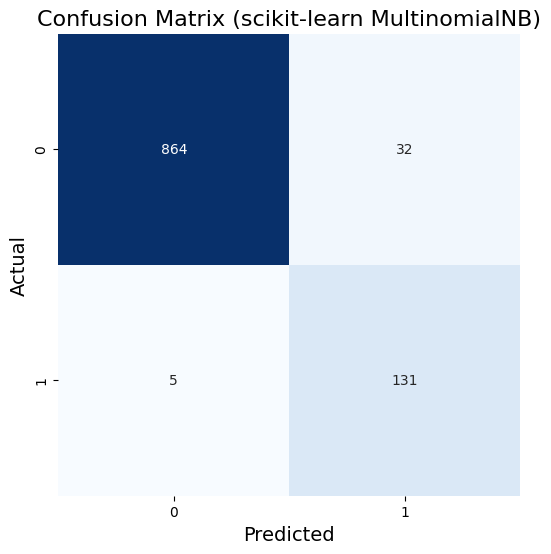

In [71]:
#Now use scikit learn's inbuilt naive bayes classifier and compare the results
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report
import seaborn as sns
nb_sklearn = MultinomialNB()
nb_sklearn.fit(X_train, y_train)
y_pred_sklearn = nb_sklearn.predict(X_test)
print("=== NAIVE BAYES (scikit-learn MultinomialNB) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_sklearn)}")
print(f"Precision: {precision_score(y_test, y_pred_sklearn)}")
print(f"Recall: {recall_score(y_test, y_pred_sklearn)}")
print(f"F1-Score: {f1_score(y_test, y_pred_sklearn)}")
print()
print("Classification Report:")
print(classification_report(y_test, y_pred_sklearn))

conf_matrix_sklearn = confusion_matrix(y_test, y_pred_sklearn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sklearn, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.title('Confusion Matrix (scikit-learn MultinomialNB)', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()